In [1]:
from enriched_ph.EnrichedPH import PCF, weighted_wasserstein_distance
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 24

# Minimal examples

## A loop

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], float)
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime = 547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.construct_smoothed_cocycles(1, 0.1, "combinatorial_full", nsp=1)
print("The 1-simplices at filtration value 0.6")
print(mdl.nd_simplex_collection[1][:4])
print("The original cocycle ([birth, death], [filtration value, cocycle])")
print(mdl.org_cocycles[1])
print("The smoothed cocycle")
print(mdl.pcoh_cocycles[1])

The 1-simplices at filtration value 0.6
[(0, 1), (0, 2), (1, 3), (2, 3)]
The original cocycle ([birth, death], [filtration value, cocycle])
[[0.5, 0.7071067811865476, [0.6035533905932737, array([0., 0., 0., 1.])]]]
The smoothed cocycle
[[0.5, 0.7071067811865476, [0.6035533905932737, array([-0.25,  0.25, -0.25,  0.25])]]]


## An octahedron

In [3]:
X = np.array([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]], float)
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime = 547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(2)
mdl.assemble_boundary_matrix(3)
mdl.construct_smoothed_cocycles(2, 0.1, "combinatorial_full", nsp=1)
print("The 2-simplices at filtration value 0.908")
print(mdl.nd_simplex_collection[2][:8])
print("The original cocycle ([birth, death], [filtration value, cocycle])")
print(mdl.org_cocycles[2])
print("The smoothed cocycle")
print(mdl.pcoh_cocycles[2])

The 2-simplices at filtration value 0.908
[(1, 3, 5), (1, 2, 5), (0, 3, 5), (0, 2, 5), (1, 2, 4), (1, 3, 4), (0, 3, 4), (0, 2, 4)]
The original cocycle ([birth, death], [filtration value, cocycle])
[[0.8164965930944731, 1.0, [0.9082482965472365, array([0., 0., 0., 0., 0., 0., 0., 1.])]]]
The smoothed cocycle
[[0.8164965930944731, 1.0, [0.9082482965472365, array([-0.125,  0.125,  0.125, -0.125, -0.125,  0.125, -0.125,  0.125])]]]


# 2D examples

## Two annuluses

In [4]:
data = np.loadtxt("./inputs/example_two_annulus_1.pts")
X = data[:,:2]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('rips_euc', rips_max=2)
mdl.compute_volume()
mdl.pcoh(prime = 547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
print("finished")
mdl.construct_smoothed_cocycles(1, 0.005, "combinatorial_full", nsp=1)
barcode_1, filt_values_1, feature_values_1 = mdl.compute_enriched_barcode(f, 1)

finished


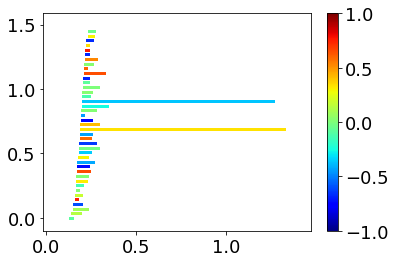

In [5]:
mpl.rcParams['font.size'] = 18
mdl.plot_enriched_barcode(barcode_1, filt_values_1, feature_values_1, vminmax=[-1,1])
plt.savefig("./figures/enriched_barcode_two_annulus_1.png", dpi=500)
plt.show()

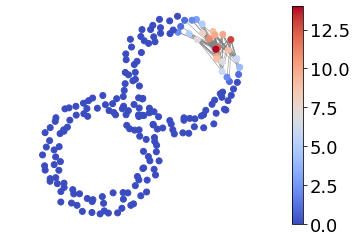

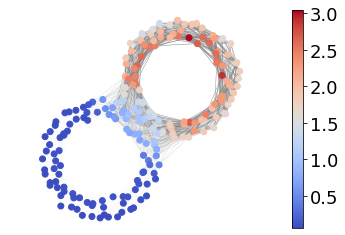

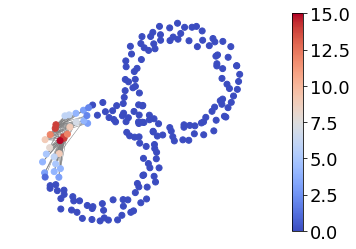

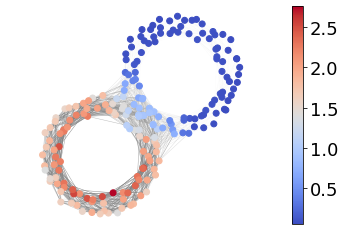

In [8]:
smoothed_cocycles = mdl.pcoh_cocycles[1]
org_cocycles = mdl.org_cocycles[1]
mpl.rcParams['font.size'] = 18
for i in range(len(smoothed_cocycles)):
    bar_smth = smoothed_cocycles[i]
    bar_org = org_cocycles[i]
    if bar_org[1] - bar_org[0] > 0.5:
        alpha_hat = bar_org[2][1]
        alpha_bar = bar_smth[2][1]
        pt_weights = mdl.point_weights(alpha_bar, 1)
        mdl.plot_cocycle_1D(alpha_hat, None)
        plt.savefig("./figures/original_cocycle_"+str(i+1)+"_two_annulus_1.png", dpi=500)
        plt.show()
        mdl.plot_cocycle_1D(alpha_bar, None)
        plt.savefig("./figures/smoothed_cocycle_"+str(i+1)+"_two_annulus_1.png", dpi=500)
        plt.show()

(-1.1965311491700001, 2.65549328533, -1.2150717024255, 2.6473694114354998)

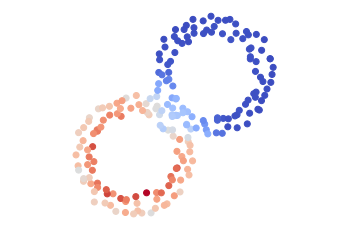

In [11]:
plt.scatter(X[:,0], X[:,1], c=pt_weights, cmap="coolwarm")
plt.axis("equal"); plt.axis("off")

## The distance profile

In [7]:
data = np.loadtxt("./inputs/example_two_annulus_2.pts")
X = data[:,:2]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('rips_euc', rips_max=1.5)
mdl.compute_volume()
mdl.pcoh(prime = 547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.construct_smoothed_cocycles(1, 0.005, "combinatorial_full", nsp=1)
barcode_2, filt_values_2, feature_values_2 = mdl.compute_enriched_barcode(f, 1)

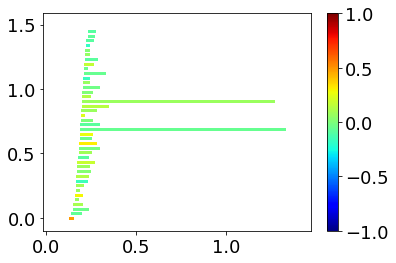

In [8]:
mdl.plot_enriched_barcode(barcode_2, filt_values_2, feature_values_2, vminmax=[-1,1])
plt.savefig("./figures/enriched_barcode_two_annulus_2.png", dpi=500)
plt.show()

In [9]:
data = np.loadtxt("./inputs/example_one_annulus.pts")
X = data[:,:2]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('rips_euc', rips_max=1.5)
mdl.compute_volume()
mdl.pcoh(prime = 547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.construct_smoothed_cocycles(1, 0.005, "combinatorial_full", nsp=1)
barcode_3, filt_values_3, feature_values_3 = mdl.compute_enriched_barcode(f, 1)

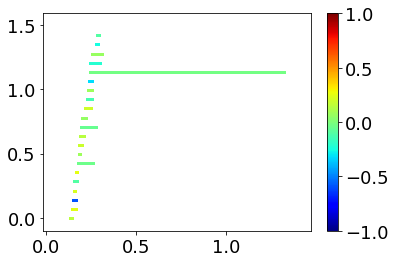

In [10]:
mdl.plot_enriched_barcode(barcode_3, filt_values_3, feature_values_3, vminmax=[-1,1])
plt.savefig("./figures/enriched_barcode_one_annulus.png", dpi=500)
plt.show()

In [11]:
barcode1 = np.concatenate((barcode_1, feature_values_1), axis=1)
barcode2 = np.concatenate((barcode_2, feature_values_2), axis=1)
barcode3 = np.concatenate((barcode_3, feature_values_3), axis=1)

Dis_1_2 = weighted_wasserstein_distance(barcode1, barcode2, np.arange(0.0,1.0+0.005,0.005), 2)
Dis_1_3 = weighted_wasserstein_distance(barcode1, barcode3, np.arange(0.0,1.0+0.005,0.005), 2)
Dis_2_3 = weighted_wasserstein_distance(barcode2, barcode3, np.arange(0.0,1.0+0.005,0.005), 2)

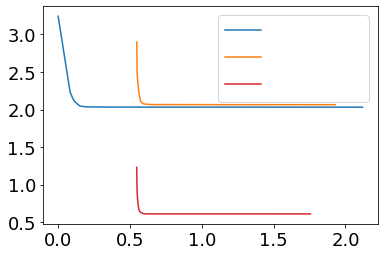

In [12]:
mpl.rcParams['font.size'] = 18
plt.plot(Dis_1_2[:,0], Dis_1_2[:,1], '-C0', label='               ')
plt.plot(Dis_1_3[:,0], Dis_1_3[:,1], '-C1', label='               ')
plt.plot(Dis_2_3[:,0], Dis_2_3[:,1], '-C3', label='               ')
plt.legend()
plt.savefig("./figures/wasserstein_curves_annulus_example.png", dpi=500)
plt.show()

# 3D examples

## Cuboid with two cavities

In [17]:
data = np.loadtxt("./inputs/example_cuboid.pts")
X = data[:,:3]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(2)
mdl.assemble_boundary_matrix(3)
mdl.construct_smoothed_cocycles(2, 0.025, "combinatorial_full", nsp=1)
barcode_cuboid, filt_values_cuboid, feature_values_cuboid = mdl.compute_enriched_barcode(f, 2)

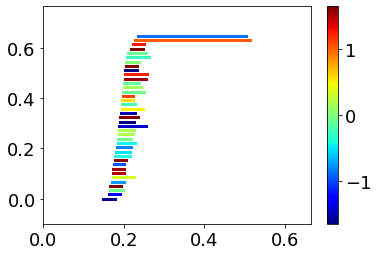

In [18]:
mdl.plot_enriched_barcode(barcode_cuboid, filt_values_cuboid, feature_values_cuboid)
plt.savefig("./figures/enriched_barcode_cuboid.png", dpi=500)
plt.show()

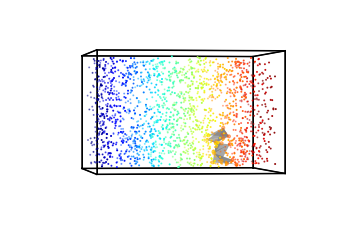

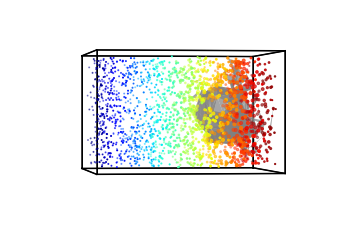

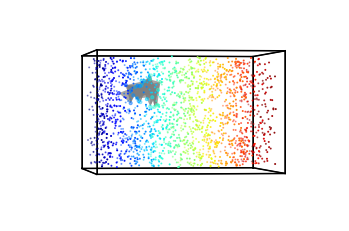

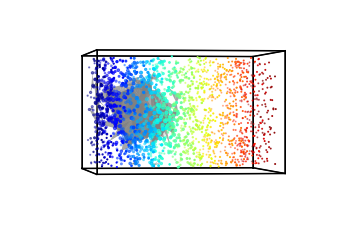

In [19]:
smoothed_cocycles = mdl.pcoh_cocycles[2]
org_cocycles = mdl.org_cocycles[2]
for i in range(len(smoothed_cocycles)):
    bar_smth = smoothed_cocycles[i]
    bar_org = org_cocycles[i]
    if bar_org[1] - bar_org[0] > 0.2:
        alpha_hat = bar_org[2][-1]
        alpha_bar = bar_smth[2][-1]
        mdl.plot_cocycle_2D(alpha_hat)
        plt.plot([-0.099,-0.099], [-0.099,-0.099], [-0.099,2.099], color='k', lw=1)
        plt.plot([4.099,4.099], [-0.099,-0.099], [-0.099,2.099], color='k', lw=1)
        plt.plot([-0.099,-0.099], [2.099,2.099], [-0.099,2.099], color='k', lw=1)
        plt.plot([4.099,4.099], [2.099,2.099], [-0.099,2.099], color='k', lw=1)

        plt.plot([-0.099,-0.099], [-0.099,2.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([4.099,4.099], [-0.099,2.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([4.099,4.099], [-0.099,2.099], [2.099,2.099], color='k', lw=1)
        plt.plot([-0.099,-0.099], [-0.099,2.099], [2.099,2.099], color='k', lw=1)

        plt.plot([-0.099,4.099], [-0.099,-0.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([-0.099,4.099], [2.099,2.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([-0.099,4.099], [-0.099,-0.099], [2.099,2.099], color='k', lw=1)
        plt.plot([-0.099,4.099], [2.099,2.099], [2.099,2.099], color='k', lw=1)
        plt.savefig("./figures/original_cocycle_"+str(i+1)+"_cuboid.png", dpi=500)
        plt.show()
        mdl.plot_cocycle_2D(alpha_bar)
        plt.plot([-0.099,-0.099], [-0.099,-0.099], [-0.099,2.099], color='k', lw=1)
        plt.plot([4.099,4.099], [-0.099,-0.099], [-0.099,2.099], color='k', lw=1)
        plt.plot([-0.099,-0.099], [2.099,2.099], [-0.099,2.099], color='k', lw=1)
        plt.plot([4.099,4.099], [2.099,2.099], [-0.099,2.099], color='k', lw=1)

        plt.plot([-0.099,-0.099], [-0.099,2.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([4.099,4.099], [-0.099,2.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([4.099,4.099], [-0.099,2.099], [2.099,2.099], color='k', lw=1)
        plt.plot([-0.099,-0.099], [-0.099,2.099], [2.099,2.099], color='k', lw=1)

        plt.plot([-0.099,4.099], [-0.099,-0.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([-0.099,4.099], [2.099,2.099], [-0.099,-0.099], color='k', lw=1)
        plt.plot([-0.099,4.099], [-0.099,-0.099], [2.099,2.099], color='k', lw=1)
        plt.plot([-0.099,4.099], [2.099,2.099], [2.099,2.099], color='k', lw=1)
        plt.savefig("./figures/smoothed_cocycle_"+str(i+1)+"_cuboid.png", dpi=500)
        plt.show()

## Cucurbit[8]uril

Carbon


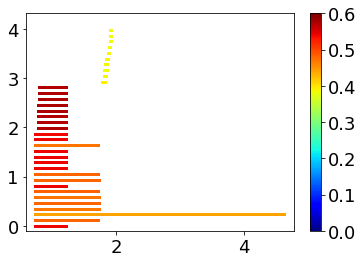

In [21]:
data = np.loadtxt("./inputs/CB8_con_C.pts")
X = data[:,:3]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.construct_smoothed_cocycles(1, 0.01, "combinatorial_full", nsp=1)
b, d, e = mdl.compute_enriched_barcode(f, 1)
mpl.rcParams['font.size'] = 18
mdl.plot_enriched_barcode(b,d,e,vminmax=[0.0,0.6], colorbar_ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6])
plt.savefig("./figures/enriched_barcode_H1_CB8_Carbon.png", dpi=500)
print("Carbon")
plt.show()

Nitrogen


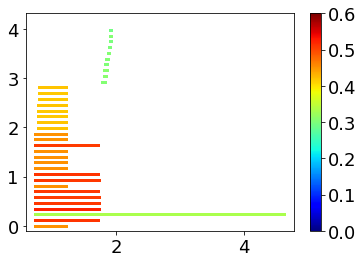

In [22]:
data = np.loadtxt("./inputs/CB8_con_N.pts")
X = data[:,:3]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.construct_smoothed_cocycles(1, 0.01, "combinatorial_full", nsp=1)
b, d, e = mdl.compute_enriched_barcode(f, 1)
mpl.rcParams['font.size'] = 18
mdl.plot_enriched_barcode(b,d,e,vminmax=[0.0,0.6], colorbar_ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6])
plt.savefig("./figures/enriched_barcode_H1_CB8_Nitrogen.png", dpi=500)
print("Nitrogen")
plt.show()

Oxygen


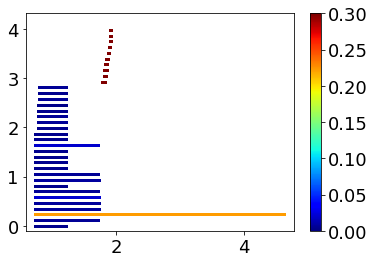

In [23]:
data = np.loadtxt("./inputs/CB8_con_O.pts")
X = data[:,:3]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.construct_smoothed_cocycles(1, 0.01, "combinatorial_full", nsp=1)
b, d, e = mdl.compute_enriched_barcode(f, 1)
mpl.rcParams['font.size'] = 18
mdl.plot_enriched_barcode(b,d,e,vminmax=[0.0,0.3], colorbar_ticks=[0,0.05,0.1,0.15,0.2,0.25,0.3])
plt.savefig("./figures/enriched_barcode_H1_CB8_Oxygen.png", dpi=500)
print("Oxygen")
plt.show()

## BN cage

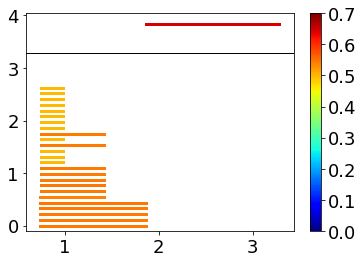

In [24]:
data = np.loadtxt("./inputs/B24N24_B.pts")
X = data[:,:3]; f = data[:,-1]
mpl.rcParams['lines.linewidth'] = 1
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.assemble_boundary_matrix(3)
mdl.construct_smoothed_cocycles(1, 0.01, "combinatorial_full", nsp=1)
mdl.construct_smoothed_cocycles(2, 0.01, "combinatorial_full", nsp=1)
barcode_1, filt_values_1, feature_values_1 = mdl.compute_enriched_barcode(f, 1)
barcode_2, filt_values_2, feature_values_2 = mdl.compute_enriched_barcode(f, 2)
barcode = np.concatenate((barcode_1,barcode_2), axis=0)
filt_values = np.concatenate((filt_values_1,filt_values_2), axis=0)
feature_values = np.concatenate((feature_values_1,feature_values_2), axis=0)
barcode_dims = np.empty([barcode.shape[0]], int)
barcode_dims[:len(barcode_1)] = 1
barcode_dims[len(barcode_1):len(barcode_1)+len(barcode_2)] = 2
mpl.rcParams['font.size'] = 18
mdl.plot_enriched_barcode(barcode,filt_values,feature_values, dims=barcode_dims, vminmax=[0.0,0.7], colorbar_ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
plt.savefig("./figures/enriched_barcode_H1_H2_B24N24_Boron.png", dpi=500)
plt.show()

## Protein-ligand complex (PDB:1a94)

In [25]:
data = np.loadtxt("./inputs/1a94_allheavy_12.0_com.pts")
X = data[:,1:4]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.assemble_boundary_matrix(3)
mdl.construct_smoothed_cocycles(1, 0.25, "combinatorial_full", nsp=1)
mdl.construct_smoothed_cocycles(2, 0.25, "combinatorial_full", nsp=1)

In [26]:
from enriched_ph.EnrichedPH import generate_coulomb_potential_enriched_barcode
pcoh_results = [mdl.nd_simplex_collection, mdl.pcoh_cocycles]
barcode_allheavy = generate_coulomb_potential_enriched_barcode(pcoh_results, X, f)
np.savetxt("./inputs/1a94_allheavy_12.0_com.eb", barcode_allheavy)

In [27]:
data = np.loadtxt("./inputs/1a94_carbon_12.0_com.pts")
X = data[:,1:4]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.assemble_boundary_matrix(3)
mdl.construct_smoothed_cocycles(1, 0.25, "combinatorial_full", nsp=1)
mdl.construct_smoothed_cocycles(2, 0.25, "combinatorial_full", nsp=1)

In [28]:
pcoh_results = [mdl.nd_simplex_collection, mdl.pcoh_cocycles]
barcode_carbon = generate_coulomb_potential_enriched_barcode(pcoh_results, X, f)
np.savetxt("./inputs/1a94_carbon_12.0_com.eb", barcode_carbon)

In [29]:
data = np.loadtxt("./inputs/1a94_nonet_12.0_com.pts")
X = data[:,1:4]; f = data[:,-1]
mdl = PCF(X)
mdl.filtration('alpha')
mdl.compute_volume()
mdl.pcoh(prime=547)
mdl.collect_nd_simplices()
mdl.assemble_boundary_matrix(1)
mdl.assemble_boundary_matrix(2)
mdl.assemble_boundary_matrix(3)
mdl.construct_smoothed_cocycles(1, 0.25, "combinatorial_full", nsp=1)
mdl.construct_smoothed_cocycles(2, 0.25, "combinatorial_full", nsp=1)

In [30]:
pcoh_results = [mdl.nd_simplex_collection, mdl.pcoh_cocycles]
barcode_nonet = generate_coulomb_potential_enriched_barcode(pcoh_results, X, f)
np.savetxt("./inputs/1a94_nonet_12.0_com.eb", barcode_nonet)

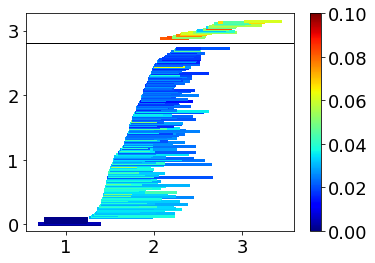

In [31]:
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['font.size'] = 18
mdl.plot_enriched_barcode(barcode_allheavy[:,1:3], 
                          np.mean(barcode_allheavy[:,1:3], axis=1).reshape(-1,1), 
                          barcode_allheavy[:,-1].reshape(-1,1), dims=barcode_allheavy[:,0], vminmax=[0,0.1])
plt.savefig("./figures/enriched_barcode_1a94_allheavy.png", dpi=500)

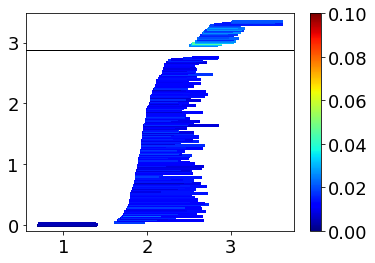

In [32]:
mdl.plot_enriched_barcode(barcode_carbon[:,1:3], 
                          np.mean(barcode_carbon[:,1:3], axis=1).reshape(-1,1), 
                          barcode_carbon[:,-1].reshape(-1,1), dims=barcode_carbon[:,0], vminmax=[0,0.1])
plt.savefig("./figures/enriched_barcode_1a94_carbon.png", dpi=500)

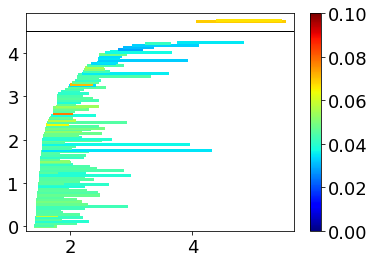

In [33]:
mdl.plot_enriched_barcode(barcode_nonet[:,1:3], 
                          np.mean(barcode_nonet[:,1:3], axis=1).reshape(-1,1), 
                          barcode_nonet[:,-1].reshape(-1,1), dims=barcode_nonet[:,0], vminmax=[0,0.1])
plt.savefig("./figures/enriched_barcode_1a94_nonet.png", dpi=500)

In [34]:
tmp_ind = np.where(barcode_allheavy[:,0] == 1)[0]
barcode_allheavy_H1 = barcode_allheavy[tmp_ind,:][:,np.array([1,2,-1])]
tmp_ind = np.where(barcode_allheavy[:,0] == 2)[0]
barcode_allheavy_H2 = barcode_allheavy[tmp_ind,:][:,np.array([1,2,-1])]
tmp_ind = np.where(barcode_carbon[:,0] == 1)[0]
barcode_carbon_H1 = barcode_carbon[tmp_ind,:][:,np.array([1,2,-1])]
tmp_ind = np.where(barcode_carbon[:,0] == 2)[0]
barcode_carbon_H2 = barcode_carbon[tmp_ind,:][:,np.array([1,2,-1])]
tmp_ind = np.where(barcode_nonet[:,0] == 1)[0]
barcode_nonet_H1 = barcode_nonet[tmp_ind,:][:,np.array([1,2,-1])]
tmp_ind = np.where(barcode_nonet[:,0] == 2)[0]
barcode_nonet_H2 = barcode_nonet[tmp_ind,:][:,np.array([1,2,-1])]

In [35]:
Dis_1_2_H1 = weighted_wasserstein_distance(barcode_allheavy_H1, barcode_carbon_H1, np.arange(0.0,1.0+0.02,0.02), 2)
Dis_1_3_H1 = weighted_wasserstein_distance(barcode_allheavy_H1, barcode_nonet_H1, np.arange(0.0,1.0+0.02,0.02), 2)
Dis_2_3_H1 = weighted_wasserstein_distance(barcode_carbon_H1, barcode_nonet_H1, np.arange(0.0,1.0+0.02,0.02), 2)

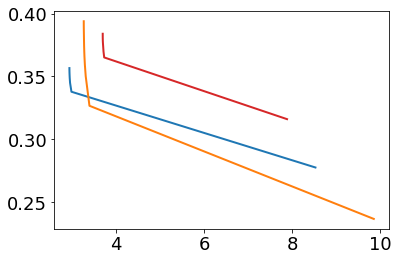

In [36]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 2
plt.plot(Dis_1_2_H1[:,0], Dis_1_2_H1[:,1], '-C0', label='               ')
plt.plot(Dis_1_3_H1[:,0], Dis_1_3_H1[:,1], '-C1', label='               ')
plt.plot(Dis_2_3_H1[:,0], Dis_2_3_H1[:,1], '-C3', label='               ')
plt.savefig("./figures/wasserstein_curves_1a94_H1.png", dpi=500)
plt.show()

In [37]:
Dis_1_2_H2 = weighted_wasserstein_distance(barcode_allheavy_H2, barcode_carbon_H2, np.arange(0.0,1.0+0.02,0.02), 2)
Dis_1_3_H2 = weighted_wasserstein_distance(barcode_allheavy_H2, barcode_nonet_H2, np.arange(0.0,1.0+0.02,0.02), 2)
Dis_2_3_H2 = weighted_wasserstein_distance(barcode_carbon_H2, barcode_nonet_H2, np.arange(0.0,1.0+0.02,0.02), 2)

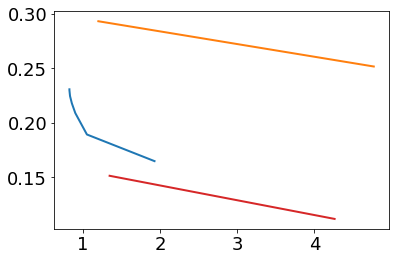

In [38]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 2
plt.plot(Dis_1_2_H2[:,0], Dis_1_2_H2[:,1], '-C0', label='               ')
plt.plot(Dis_1_3_H2[:,0], Dis_1_3_H2[:,1], '-C1', label='               ')
plt.plot(Dis_2_3_H2[:,0], Dis_2_3_H2[:,1], '-C3', label='               ')
plt.savefig("./figures/wasserstein_curves_1a94_H2.png", dpi=500)
plt.show()